# <center>Recurrent Neural Networks</center>
## <center>Inclass Project 3 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a RNN model to suggest autocompletion of half typed words. You may have seen this in many day today applications; typing an email, a text message etc. For example, suppose you type in the four letter "univ", the application may suggest you to autocomplete it by "university".

![Autocomplete](https://d33v4339jhl8k0.cloudfront.net/docs/assets/5c12e83004286304a71d5b72/images/66d0cb106eb51e63b8f9fbc6/file-gBQe016VYt.gif)

We will train a RNN to suggest possible autocompletes given $3$ - $4$ starting letters. That is if we input a string "univ" hopefully we expect to see an output like "university", "universal" etc.

For this we will use a text file (wordlist.txt) containing 10,000 common English words (you'll find the file on the moodle link). The list of words will be the "**vocabulary**" for our model.

We will use the Python **torch library** to implement our autocomplete model. 

***


Use the below cell to use any include any imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

## Section 1: Preparing the vocabulary

In [2]:
WORD_SIZE = 13

**Q1.** In the following cell provide code to load the text file (each word is in a newline), then extract the words (in lowercase) into a list.

For practical reasons of training the model we will only use words that are longer that $3$ letters and that have a maximum length of WORD_SIZE (this will be a constant we set at the beginning - you can change this and experiment with different WORD_SIZEs). As seen above it is set to $13$.

So out of the extracted list of words filter out those words that match our criteria on word length.

To train our model it is convenient to have words/strings of equal length. We will choose to convert every word to length of WORD_SIZE, by adding underscores to the end of the word if it is initially shorter than WORD_SIZE. For example, we will convert the word "university" (word length 10) into "university___" (wordlength 13). In your code include this conversion as well.

Store the processed WORD_SIZE lengthed strings in a list called vocab.

In [3]:
#TODO
# Load the text file and preprocess words
def load_and_process_words(file_path, word_size):
    vocab = []
    
    # Open the file and read lines
    with open(file_path, 'r') as file:
        words = file.readlines()
    
    # Process each word: lowercase, filter based on length, and pad
    for word in words:
        word = word.strip().lower()  # Remove any extra spaces and lowercase the word
        
        # Only keep words between 4 and WORD_SIZE letters
        if 4 <= len(word) <= word_size:
            # If word length is less than WORD_SIZE, pad it with underscores
            if len(word) < word_size:
                word = word + '_' * (word_size - len(word))
            vocab.append(word)
    
    return vocab

# Example usage
file_path = 'wordlist.txt'  # Replace with your actual file path
vocab = load_and_process_words(file_path, WORD_SIZE)
print(vocab[1300:1320])  # Print the first 10 words to check


['certificates_', 'certification', 'certified____', 'cest_________', 'chad_________', 'chain________', 'chains_______', 'chair________', 'chairman_____', 'chairs_______', 'challenge____', 'challenged___', 'challenges___', 'challenging__', 'chamber______', 'chambers_____', 'champagne____', 'champion_____', 'champions____', 'championship_']


<font color='blue'>In the above explanation it was mentioned "for practical reasons of training the model we will only use words that are longer that $3$ letters and that have a certain maximum length". In your opinion what could be those practical? Will hit help to build a better model?</font>

**Answer** 

<font color='blue'>Using words longer than 3 letters and setting a maximum word length improves model efficiency and effectiveness. Short words contribute little meaningful information, and filtering them reduces noise, speeding up training. Uniform word lengths also simplify computation and help the model focus on learning more complex patterns, leading to better generalization and predictive power.</font>

Here are the practical reasons for filtering word length:

1. **Efficiency in Training**: Short words provide little information and add noise, making training slower.
2. **Memory and Computation**: Fixed-length inputs simplify training and reduce computational cost.
3. **Predictive Power**: Longer words contain more patterns, helping the model learn word structures better.
4. **Avoiding Overfitting**: Too many short words may cause the model to overfit, reducing its generalization ability.

This approach helps build a more focused, efficient, and generalizable model.



**Q2** To input words into the model, we will need to convert each letter/character into a number. as we have seen above, the only characters in our list vocab will be the underscore and lowercase english letters. so we will convert these $27$ characters into numbers as follows: underscore -> $0$, 'a' -> $1$, 'b' -> $2$, $\cdots$, 'z' -> $26$. In the following cell,

(i) Implement a method called char_to_num, that takes in a valid character and outputs its numerical assignment.

(ii) Implement a method called num_to_char, that takes in a valid number from $0$ to $26$ and outputs the corresponding character.

(iii) Implement a method called word_to_numlist, that takes in a word from our vocabulary and outputs a (torch) tensor of numbers that corresponds to each character in the word in that order. For example: the word "united_______" will be converted to tensor([21, 14,  9, 20,  5,  4,  0,  0,  0,  0,  0,  0,  0]). You are encouraged to use your char_to_num method for this.

(iv) Implement a method called numlist_to_word, that does the opposite of the above described word_to_numlist, given a tensor of numbers from $0$ to $26$, outputs the corresponding word. You are encouraged to use your  num_to_char method for this.

Note: As mentioned since we are using the torch library we will be using tensors instead of the usual python lists or numpy arrays. Tensors are the list equivalent in torch. Torch models only accept tensors as input and they output tensors.

In [4]:
def char_to_num(char):

    #TODO
    if char == '_':
        return 0
    return ord(char) - ord('a') + 1

def num_to_char(num):

    #TODO
    if num == 0:
        return '_'
    return chr(num + ord('a') - 1)

def word_to_numlist(word):

    #TODO
    numlist = [char_to_num(char) for char in word]
    return torch.tensor(numlist, dtype=torch.long)
    
    # return(numlist)

def numlist_to_word(numlist):

    #TODO
    word = ''.join([num_to_char(num) for num in numlist])
    return word
    
    # return(word)


word = "united_______"


print(char_to_num("z"))
print(num_to_char(5))
numlist = word_to_numlist(word)
print("Word to Numlist:", numlist)
restored_word = numlist_to_word(numlist)
print("Numlist to Word:", restored_word)

26
e
Word to Numlist: tensor([21, 14,  9, 20,  5,  4,  0,  0,  0,  0,  0,  0,  0])
Numlist to Word: united_______


<font color='blue'>We convert letter into just numbers based on their aphabetical order, I claim that it is a very bad way to encode data such as letters to be fed into learning models, please write your explanation to or against my claim. If you are searching for reasons, the keyword 'categorical data' may be useful. Although the letters in our case are not treated as categorical data, the same reasons as for categorical data is applicable. Even if my claim is valid, at the end it won't matter due to something called "embedding layers" that we will use in our model. What is an embedding layer? What is it's purpose? Explain.</font>

**Answer**

 claim is valid. Encoding letters as numbers based on alphabetical order is a poor method because:

1. **No inherent relationships**: Numerical values suggest a false ordinal relationship between letters.
2. **Confuses the model**: The model might misinterpret the values as having meaningful distances between them, which doesn't apply to letters or categorical data.

However, this issue is resolved with **embedding layers**.

### Embedding Layer Purpose:

- **Captures relationships**: Transforms each letter into a dense, learned vector that reflects context and usage.
- **Reduces dimensionality**: Provides efficient vector representations without using high-dimensional one-hot encoding.
- **Avoids ordinal bias**: Learns meaningful patterns, preventing misinterpretation of numeri


In summary, embeddings fix the limitations of direct letter-to-number encodings by providing learned, context-rich representations.
entations.

## Section 2: Implementing the Autocomplete model

We will implement a RNN model based on LSTM. The [video tutorial](https://www.youtube.com/watch?v=tL5puCeDr-o) will be useful. Our model will be only one hidden layer, but feel free to sophisticate with more layers after the project for your own experiments.

Our model will contain all the training and prediction methods as single package in a class (autocompleteModel) we will define and implement below.

In [5]:
LEARNING_RATE = 0.005

In [6]:
class autocompleteModel(nn.Module):

    #Constructor
    def __init__(self, alphabet_size, embed_dim, hidden_size, num_layers):
        super().__init__()

        #Set the input parameters to self parameters

        #TODO
        self.alphabet_size = alphabet_size
        self.embed_dim = embed_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        #Initialize the layers in the model:
        #1 embedding layer, 1 - LSTM cell (hidden layer), 1 fully connected layer with linear activation

        #TODO
        self.embedding = nn.Embedding(alphabet_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, alphabet_size)

    
    #Feedforward
    def forward(self, character, hidden_state, cell_state):

        #Perform feedforward in order
        #1. Embed the input (one charcter represented by a number)
        embedded = self.embedding(character)
        #2. Feed the embedded output to the LSTM cell
        lstm_out, (hidden_state, cell_state) = self.lstm(embedded.unsqueeze(1), (hidden_state, cell_state))
        #3. Feed the LSTM output to the fully connected layer to obtain the output
        output = self.fc(lstm_out.squeeze(1))
        #4. return the output, and both the hidden state and cell state from the LSTM cell output
        
        #TODO
        
        
        return output, hidden_state, cell_state

    #Intialize the first hidden state and cell state (for the start of a word) as zero tensors of required length.
    def initial_state(self,batch_size):

        #TODO
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        
        return (h0, c0)

    #Train the model in epochs given the vocab, the training will be fed in batches of batch_size
    def trainModel(self, vocab, epochs = 5, batch_size = 100):

        #Convert the model into train mode
        self.train()

        #Set the optimizer (ADAM), you may need to provide the model parameters  and learning rate
        optimizer = optim.Adam(self.parameters(), lr=LEARNING_RATE)
        loss_function = nn.CrossEntropyLoss()

        #Keep a log of the loss at the end of each training cycle.
        loss_log = []

        for e in range(epochs):

            #TODO: Shuffle the vocab list the start of each epoch
            random.shuffle(vocab)
            num_iter = len(vocab) // batch_size  # Number of iterations per epoch

            for i in range(num_iter):
                vocab_batch = vocab[i * batch_size:(i + 1) * batch_size]
                #TODO: Set the loss to zero, initialize the optimizer with zero_grad at the beginning of each training cycle.
                
                optimizer.zero_grad()
                total_loss = 0

                for word in vocab_batch:

                    #TODO: Initialize the hidden state and cell state at the start of each word.
                    h0, c0 = self.initial_state(1)
                    #TODO: Convert the word into a tensor of number and create input and target from the word
                    word_tensor = word_to_numlist(word)
                    #Input will be the first WORD_SIZE - 1 charcters and target is the last WORD_SIZE - 1 charcters
                    input_chars = word_tensor[:-1].unsqueeze(0)   # First WORD_SIZE - 1 characters
                    target_chars = word_tensor[1:]   # Last WORD_SIZE - 1 characters

                    #Loop through each character (as a number) in the word
                    loss = 0
                    for c in range(WORD_SIZE - 1):

                        char_input = input_chars[:, c]
                        #TODO: Feed the cth character to the model (feedforward) and comput the loss (use cross entropy in torch)
                        output, h0, c0 = self.forward(char_input, h0, c0)
                        loss += loss_function(output, target_chars[c].unsqueeze(0))
                
                        total_loss += loss
                        
                # TODO: Compute the average loss per word in the batch and perform backpropagation (.backward())
                
                total_loss /= batch_size
                total_loss.backward()
                #TODO: Update model parameters using the optimizer
                optimizer.step()
                #Update the loss_log 
                loss_log.append(loss.item())

            # print("Epoch: ", e)
            print(f"Epoch: {e + 1}, Loss: {total_loss}")

        #TODO Plot a graph of the variation of the loss.
        plt.plot(loss_log)
        plt.title('Loss Variation over Epochs')
        plt.xlabel('Training Iterations')
        plt.ylabel('Loss')
        plt.show()

    #Perform autocmplete given a sample of strings (typically 3-5 starting letters)
    def autocomplete(self, sample):
        # Convert the model into evaluation mode
        self.eval()
    
        completed_list = []
    
        for literal in sample:
            # Convert the literal word to tensor and add batch dimension
            literal_tensor = word_to_numlist(literal).unsqueeze(0)
    
            # Initialize the hidden and cell states (batch_size = 1 for single word)
            hidden_state, cell_state = self.initial_state(batch_size=1)
    
            predicted_word = literal
    
            # Predict the remaining characters
            for i in range(len(literal), WORD_SIZE):
                char_input = literal_tensor[:, i - 1]  # Get the last character
    
                # Perform forward pass
                output, hidden_state, cell_state = self.forward(char_input, hidden_state, cell_state)
    
                # Apply softmax to get probabilities and pick the next character
                probs = torch.softmax(output, dim=1)
                next_char = torch.multinomial(probs, 1).item()
    
                # Convert the predicted character number to a char and append to the word
                next_char_literal = num_to_char(next_char)
                predicted_word += next_char_literal
    
                # Update the literal tensor with the predicted character
                literal_tensor = torch.cat((literal_tensor, torch.tensor([[next_char]], dtype=torch.long)), dim=1)
    
            completed_list.append(predicted_word)
    
        return completed_list

Epoch: 1, Loss: 126.1842269897461
Epoch: 2, Loss: 124.46572875976562
Epoch: 3, Loss: 120.83642578125
Epoch: 4, Loss: 112.6070785522461
Epoch: 5, Loss: 112.12964630126953


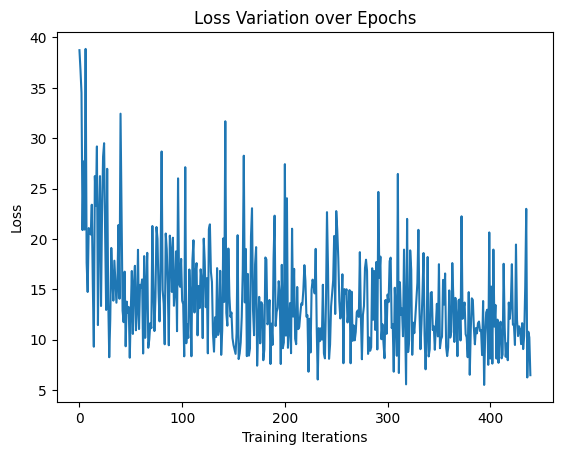

In [26]:
model = autocompleteModel(alphabet_size=27, embed_dim=64, hidden_size=128, num_layers=1)
model.trainModel(vocab, epochs=5, batch_size=100)

In [28]:
# Autocomplete example
samples = ["univ", "math", "neur", "engin"]
completed_words = model.autocomplete(samples)
print(completed_words)

['univientimati', 'mathaving____', 'neurescombana', 'enginewad____']


## Section 3: Using and evaluating the model

(i) Feel free to initialize a autocompleteModel using different embedding dimensions and hidden layer sizes. Use different learning rates, epochs, batch sizes. Train the best model you can. Show the loss curves in you answers.

(ii) Evaluate it on different samples of partially filled in words. Eg: ["univ", "math", "neur", "engin"] etc. Please show outputs for different samples.

<font color='blue'>Comment on the results. Is it successful? Do you see familiar substrings in the generated tesxt such as "tion", "ing", "able" etc. What are your suggestions to improve the model?</font>

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.001, batch_size: 64
Epoch: 1, Loss: 176.42491149902344
Epoch: 2, Loss: 168.5276641845703
Epoch: 3, Loss: 159.64283752441406
Epoch: 4, Loss: 160.8590850830078
Epoch: 5, Loss: 153.53428649902344
Epoch: 6, Loss: 152.03976440429688
Epoch: 7, Loss: 151.65538024902344
Epoch: 8, Loss: 145.5657958984375
Epoch: 9, Loss: 141.97833251953125
Epoch: 10, Loss: 141.19696044921875


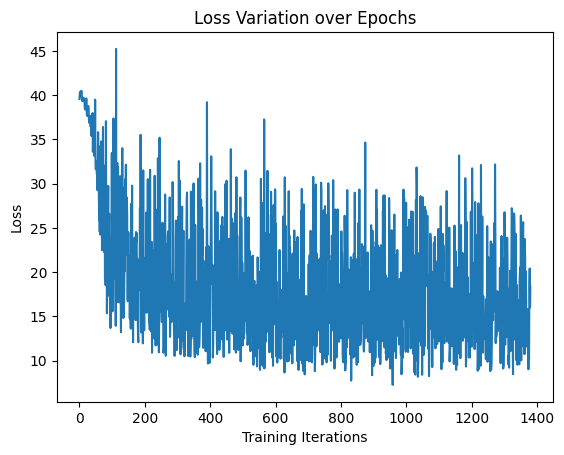

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.001, batch_size: 128
Epoch: 1, Loss: 206.09959411621094
Epoch: 2, Loss: 180.7041473388672
Epoch: 3, Loss: 173.03684997558594
Epoch: 4, Loss: 168.1151580810547
Epoch: 5, Loss: 161.91552734375
Epoch: 6, Loss: 157.4910430908203
Epoch: 7, Loss: 159.0757598876953
Epoch: 8, Loss: 147.9427490234375
Epoch: 9, Loss: 151.65699768066406
Epoch: 10, Loss: 146.16732788085938


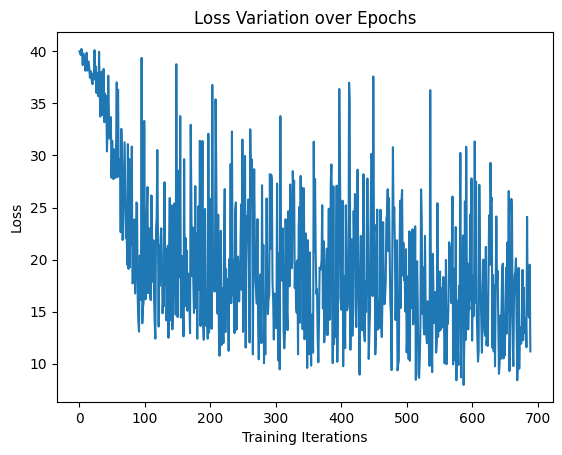

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.001, batch_size: 256
Epoch: 1, Loss: 243.82199096679688
Epoch: 2, Loss: 209.9029998779297
Epoch: 3, Loss: 193.0970916748047
Epoch: 4, Loss: 184.6958770751953
Epoch: 5, Loss: 182.78099060058594
Epoch: 6, Loss: 175.52938842773438
Epoch: 7, Loss: 175.44570922851562
Epoch: 8, Loss: 167.6781005859375
Epoch: 9, Loss: 162.51087951660156
Epoch: 10, Loss: 158.41519165039062


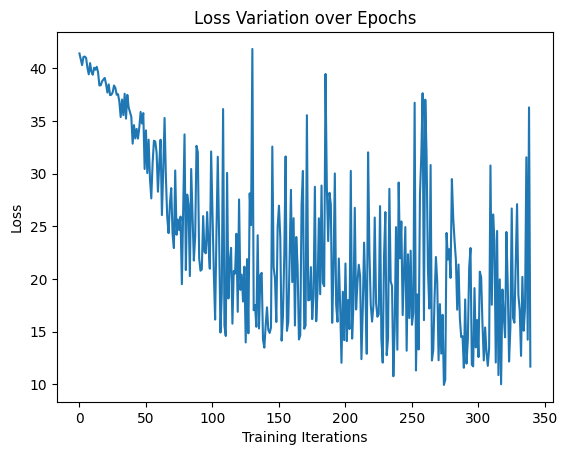

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.005, batch_size: 64
Epoch: 1, Loss: 152.91111755371094
Epoch: 2, Loss: 139.5443115234375
Epoch: 3, Loss: 137.57012939453125
Epoch: 4, Loss: 139.65130615234375
Epoch: 5, Loss: 127.70028686523438
Epoch: 6, Loss: 125.44048309326172
Epoch: 7, Loss: 127.99650573730469
Epoch: 8, Loss: 130.92022705078125
Epoch: 9, Loss: 133.28982543945312
Epoch: 10, Loss: 136.88316345214844


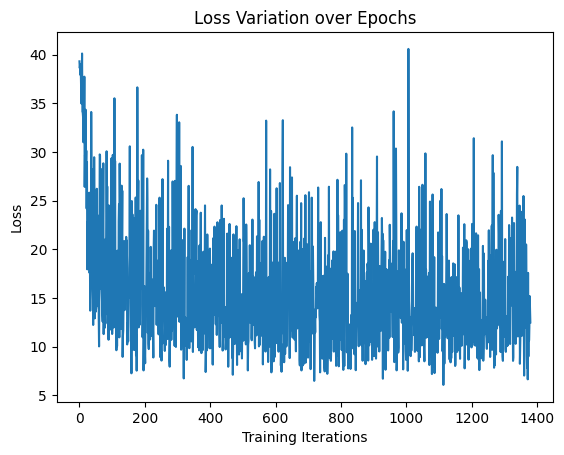

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.005, batch_size: 128
Epoch: 1, Loss: 166.62782287597656
Epoch: 2, Loss: 145.85670471191406
Epoch: 3, Loss: 145.87139892578125
Epoch: 4, Loss: 142.3931884765625
Epoch: 5, Loss: 137.59332275390625
Epoch: 6, Loss: 137.2546844482422
Epoch: 7, Loss: 132.78500366210938
Epoch: 8, Loss: 137.31973266601562
Epoch: 9, Loss: 134.0849609375
Epoch: 10, Loss: 135.31529235839844


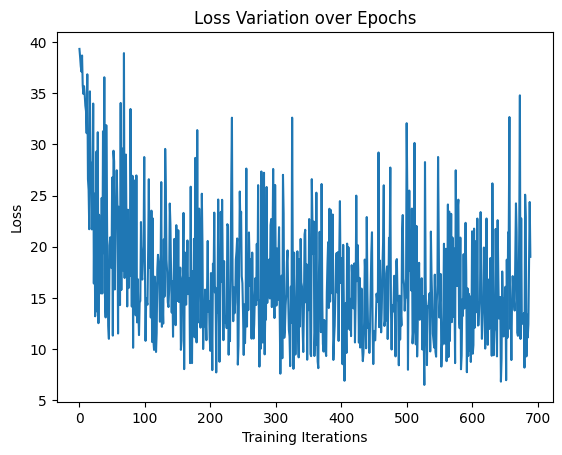

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.005, batch_size: 256
Epoch: 1, Loss: 186.986572265625
Epoch: 2, Loss: 169.38931274414062
Epoch: 3, Loss: 157.43789672851562
Epoch: 4, Loss: 148.93218994140625
Epoch: 5, Loss: 142.90988159179688
Epoch: 6, Loss: 145.07949829101562
Epoch: 7, Loss: 141.59242248535156
Epoch: 8, Loss: 140.64183044433594
Epoch: 9, Loss: 138.7671356201172
Epoch: 10, Loss: 138.28390502929688


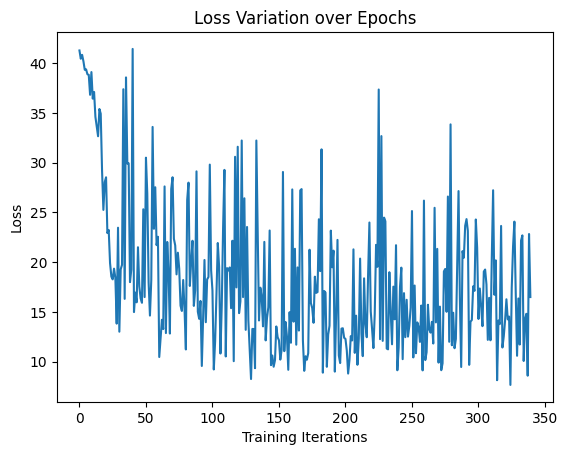

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.01, batch_size: 64
Epoch: 1, Loss: 145.065185546875
Epoch: 2, Loss: 133.30856323242188
Epoch: 3, Loss: 131.29718017578125
Epoch: 4, Loss: 133.6892547607422
Epoch: 5, Loss: 140.2054443359375
Epoch: 6, Loss: 128.06158447265625
Epoch: 7, Loss: 126.82479858398438
Epoch: 8, Loss: 128.69773864746094
Epoch: 9, Loss: 127.34668731689453
Epoch: 10, Loss: 128.4469757080078


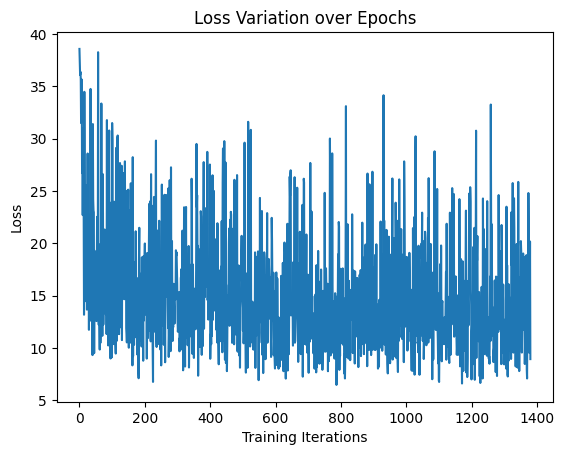

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.01, batch_size: 128
Epoch: 1, Loss: 157.10580444335938
Epoch: 2, Loss: 150.45172119140625
Epoch: 3, Loss: 138.26571655273438
Epoch: 4, Loss: 134.32965087890625
Epoch: 5, Loss: 133.94642639160156
Epoch: 6, Loss: 129.72581481933594
Epoch: 7, Loss: 132.31187438964844
Epoch: 8, Loss: 132.13330078125
Epoch: 9, Loss: 134.3822021484375
Epoch: 10, Loss: 129.46693420410156


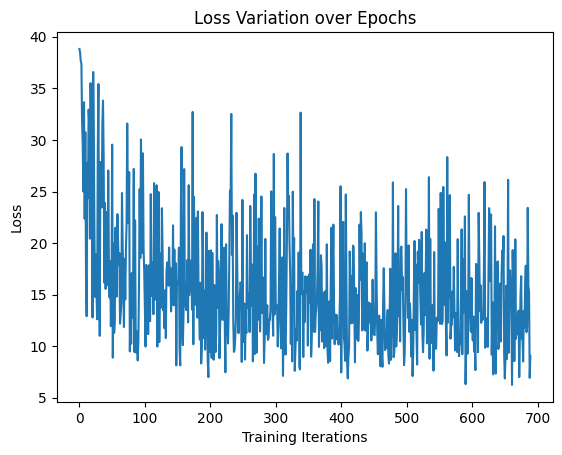

Training model with embed_dim: 10, hidden_size: 20, learning_rate: 0.01, batch_size: 256
Epoch: 1, Loss: 170.3774871826172
Epoch: 2, Loss: 158.92904663085938
Epoch: 3, Loss: 149.28494262695312
Epoch: 4, Loss: 142.98773193359375
Epoch: 5, Loss: 140.52157592773438
Epoch: 6, Loss: 138.78936767578125
Epoch: 7, Loss: 135.4013214111328
Epoch: 8, Loss: 136.13577270507812
Epoch: 9, Loss: 133.84339904785156
Epoch: 10, Loss: 131.56007385253906


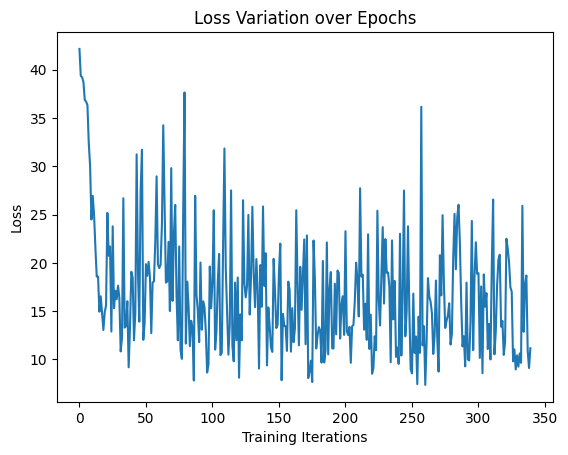

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.001, batch_size: 64
Epoch: 1, Loss: 170.55308532714844
Epoch: 2, Loss: 162.08355712890625
Epoch: 3, Loss: 149.41734313964844
Epoch: 4, Loss: 146.76956176757812
Epoch: 5, Loss: 143.90480041503906
Epoch: 6, Loss: 132.30191040039062
Epoch: 7, Loss: 146.61297607421875
Epoch: 8, Loss: 132.7748565673828
Epoch: 9, Loss: 140.8276824951172
Epoch: 10, Loss: 131.10813903808594


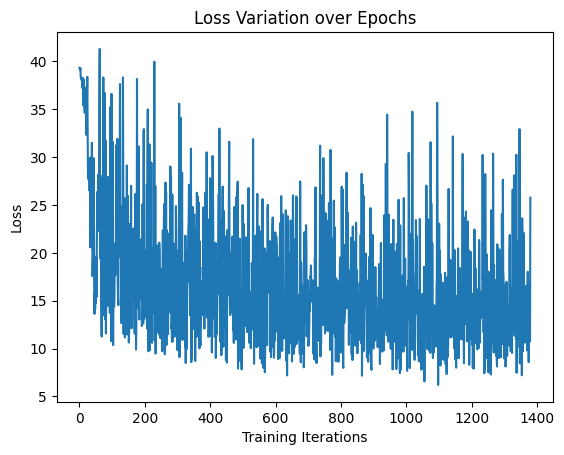

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.001, batch_size: 128
Epoch: 1, Loss: 190.20530700683594
Epoch: 2, Loss: 173.53855895996094
Epoch: 3, Loss: 164.00076293945312
Epoch: 4, Loss: 159.3799591064453
Epoch: 5, Loss: 152.56752014160156
Epoch: 6, Loss: 148.52032470703125
Epoch: 7, Loss: 146.5224609375
Epoch: 8, Loss: 145.81039428710938
Epoch: 9, Loss: 141.62649536132812
Epoch: 10, Loss: 141.2424774169922


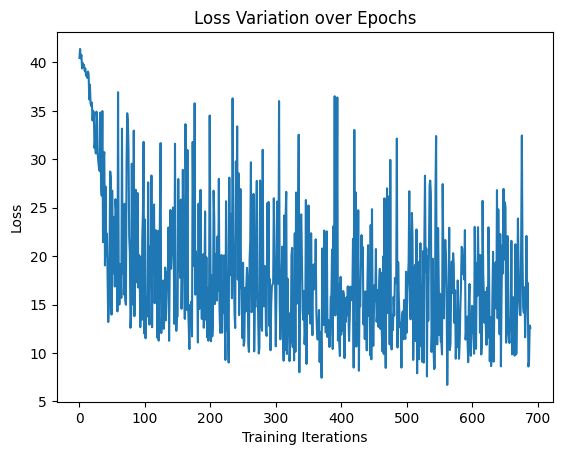

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.001, batch_size: 256
Epoch: 1, Loss: 225.52354431152344
Epoch: 2, Loss: 186.979736328125
Epoch: 3, Loss: 177.52291870117188
Epoch: 4, Loss: 172.7461395263672
Epoch: 5, Loss: 167.7806396484375
Epoch: 6, Loss: 166.73414611816406
Epoch: 7, Loss: 154.59088134765625
Epoch: 8, Loss: 154.2030487060547
Epoch: 9, Loss: 154.5770263671875
Epoch: 10, Loss: 149.25262451171875


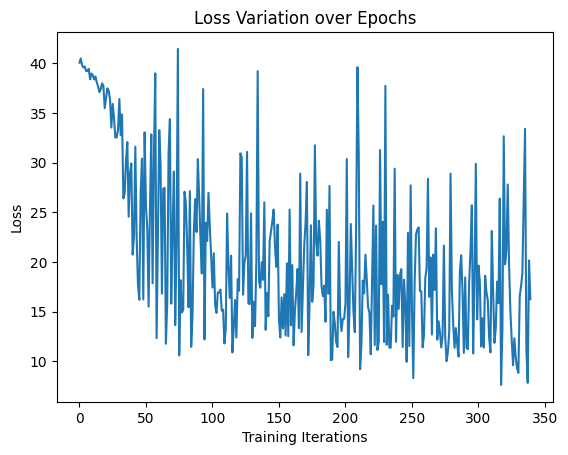

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.005, batch_size: 64
Epoch: 1, Loss: 151.3900909423828
Epoch: 2, Loss: 133.66026306152344
Epoch: 3, Loss: 129.60720825195312
Epoch: 4, Loss: 128.5377655029297
Epoch: 5, Loss: 129.2178192138672
Epoch: 6, Loss: 127.10667419433594
Epoch: 7, Loss: 119.03705596923828
Epoch: 8, Loss: 120.52913665771484
Epoch: 9, Loss: 115.6794662475586
Epoch: 10, Loss: 117.23235321044922


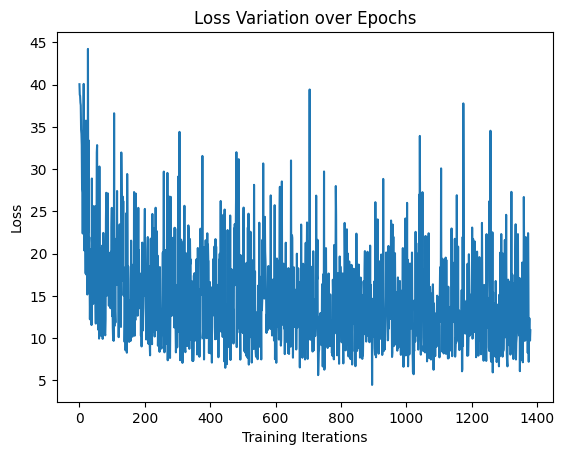

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.005, batch_size: 128
Epoch: 1, Loss: 158.16827392578125
Epoch: 2, Loss: 142.32911682128906
Epoch: 3, Loss: 134.65708923339844
Epoch: 4, Loss: 135.87635803222656
Epoch: 5, Loss: 127.43791198730469
Epoch: 6, Loss: 128.5149383544922
Epoch: 7, Loss: 123.65748596191406
Epoch: 8, Loss: 127.66293334960938
Epoch: 9, Loss: 118.5950698852539
Epoch: 10, Loss: 120.71884155273438


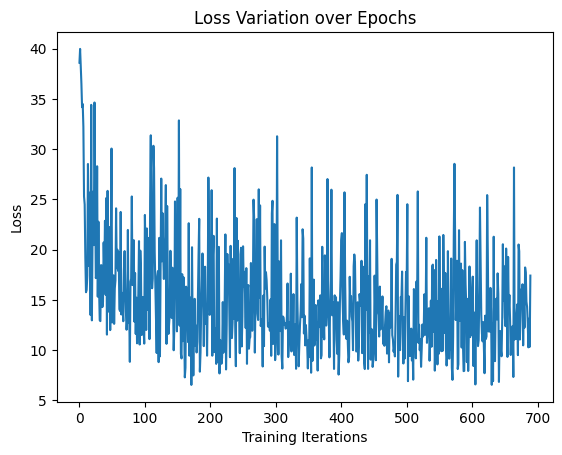

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.005, batch_size: 256
Epoch: 1, Loss: 179.3645477294922
Epoch: 2, Loss: 158.31137084960938
Epoch: 3, Loss: 147.1064910888672
Epoch: 4, Loss: 139.24110412597656
Epoch: 5, Loss: 141.13742065429688
Epoch: 6, Loss: 135.5431365966797
Epoch: 7, Loss: 130.9325714111328
Epoch: 8, Loss: 127.92647552490234
Epoch: 9, Loss: 128.0476837158203
Epoch: 10, Loss: 125.5916748046875


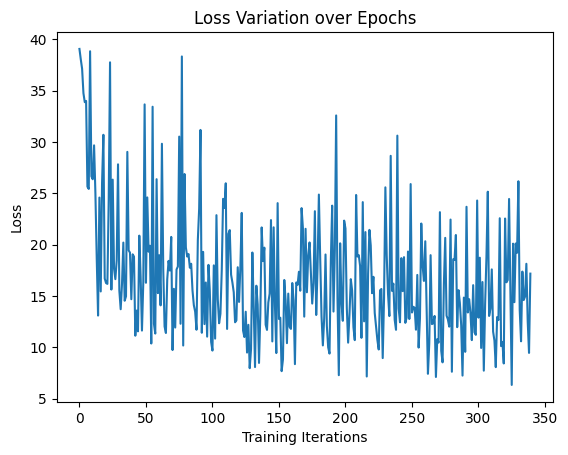

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.01, batch_size: 64
Epoch: 1, Loss: 137.63938903808594
Epoch: 2, Loss: 131.99253845214844
Epoch: 3, Loss: 128.84886169433594
Epoch: 4, Loss: 129.03558349609375
Epoch: 5, Loss: 125.83653259277344
Epoch: 6, Loss: 112.58951568603516
Epoch: 7, Loss: 124.14775085449219
Epoch: 8, Loss: 107.09671783447266
Epoch: 9, Loss: 119.80265808105469
Epoch: 10, Loss: 108.66740417480469


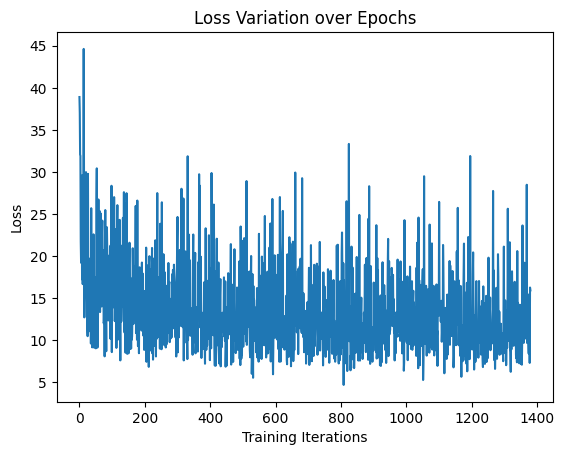

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.01, batch_size: 128
Epoch: 1, Loss: 144.12413024902344
Epoch: 2, Loss: 135.70626831054688
Epoch: 3, Loss: 131.74034118652344
Epoch: 4, Loss: 129.7646026611328
Epoch: 5, Loss: 125.47560119628906
Epoch: 6, Loss: 124.46654510498047
Epoch: 7, Loss: 118.52017974853516
Epoch: 8, Loss: 116.39624786376953
Epoch: 9, Loss: 116.6872787475586
Epoch: 10, Loss: 124.02349090576172


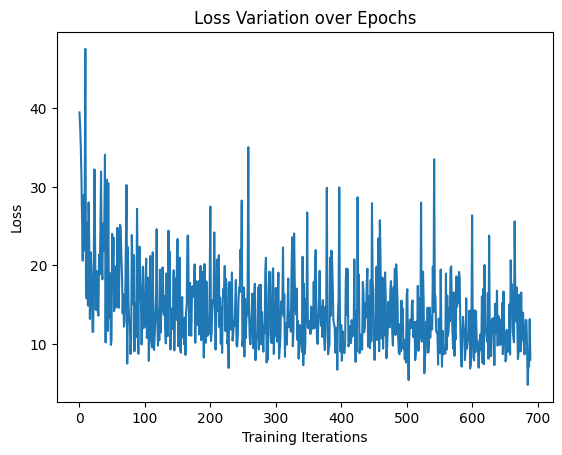

Training model with embed_dim: 10, hidden_size: 50, learning_rate: 0.01, batch_size: 256
Epoch: 1, Loss: 161.42330932617188
Epoch: 2, Loss: 145.26742553710938
Epoch: 3, Loss: 136.41055297851562
Epoch: 4, Loss: 133.39085388183594
Epoch: 5, Loss: 134.13137817382812
Epoch: 6, Loss: 126.13355255126953
Epoch: 7, Loss: 130.60330200195312
Epoch: 8, Loss: 125.10466003417969
Epoch: 9, Loss: 122.98348236083984
Epoch: 10, Loss: 121.28401947021484


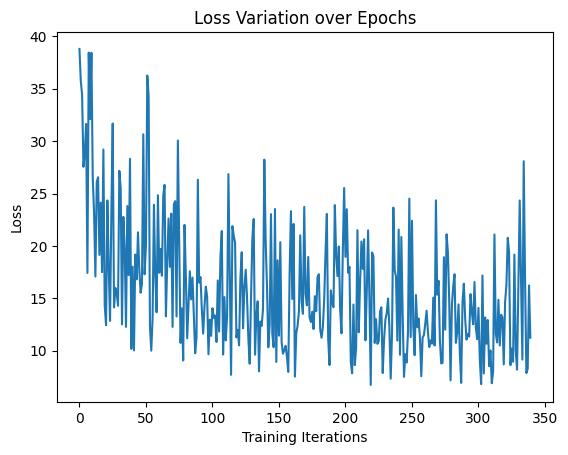

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.001, batch_size: 64
Epoch: 1, Loss: 167.13253784179688
Epoch: 2, Loss: 154.28343200683594
Epoch: 3, Loss: 133.17843627929688
Epoch: 4, Loss: 144.2259979248047
Epoch: 5, Loss: 130.4693603515625
Epoch: 6, Loss: 136.30435180664062
Epoch: 7, Loss: 133.2800750732422
Epoch: 8, Loss: 121.18991088867188
Epoch: 9, Loss: 134.6581268310547
Epoch: 10, Loss: 121.41250610351562


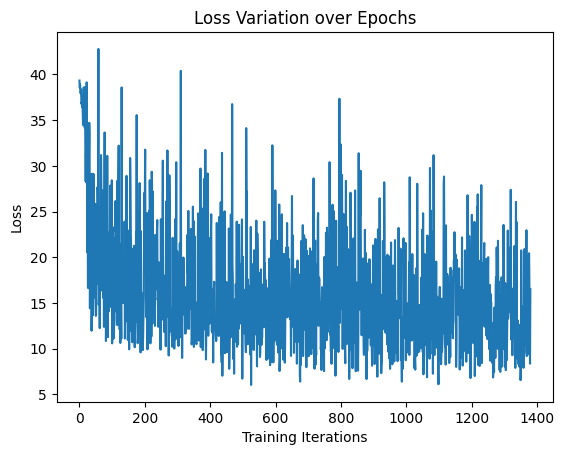

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.001, batch_size: 128
Epoch: 1, Loss: 180.3971405029297
Epoch: 2, Loss: 173.82374572753906
Epoch: 3, Loss: 160.61346435546875
Epoch: 4, Loss: 154.47885131835938
Epoch: 5, Loss: 145.09359741210938
Epoch: 6, Loss: 148.96604919433594
Epoch: 7, Loss: 136.18458557128906
Epoch: 8, Loss: 139.83053588867188
Epoch: 9, Loss: 138.23548889160156
Epoch: 10, Loss: 130.23245239257812


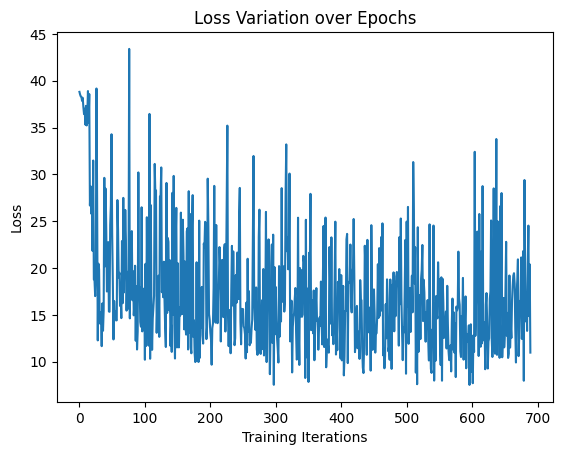

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.001, batch_size: 256
Epoch: 1, Loss: 191.7840118408203
Epoch: 2, Loss: 180.05831909179688
Epoch: 3, Loss: 177.67840576171875
Epoch: 4, Loss: 170.8147735595703
Epoch: 5, Loss: 165.90219116210938
Epoch: 6, Loss: 159.11544799804688
Epoch: 7, Loss: 160.16744995117188
Epoch: 8, Loss: 150.90902709960938
Epoch: 9, Loss: 147.9475555419922
Epoch: 10, Loss: 148.1267547607422


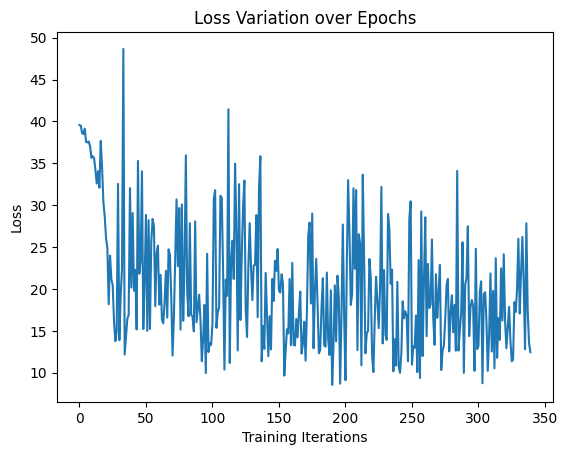

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.005, batch_size: 64
Epoch: 1, Loss: 136.69786071777344
Epoch: 2, Loss: 137.2436065673828
Epoch: 3, Loss: 131.28594970703125
Epoch: 4, Loss: 119.16764068603516
Epoch: 5, Loss: 116.69649505615234
Epoch: 6, Loss: 109.88615417480469
Epoch: 7, Loss: 115.46566772460938
Epoch: 8, Loss: 115.9957046508789
Epoch: 9, Loss: 105.0901870727539
Epoch: 10, Loss: 106.0615005493164


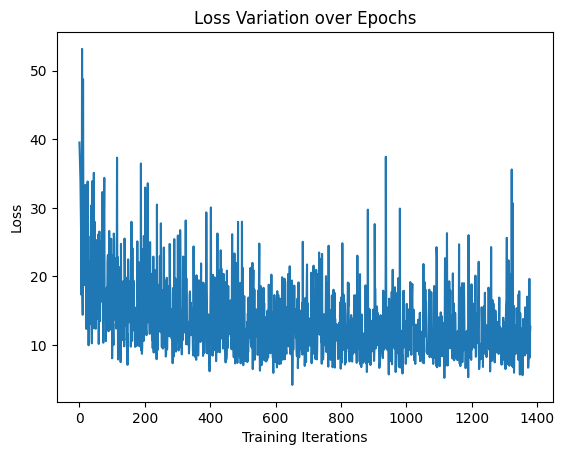

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.005, batch_size: 128
Epoch: 1, Loss: 154.48814392089844
Epoch: 2, Loss: 135.0712127685547
Epoch: 3, Loss: 130.6121826171875
Epoch: 4, Loss: 131.9008331298828
Epoch: 5, Loss: 124.91928100585938
Epoch: 6, Loss: 123.11798095703125
Epoch: 7, Loss: 121.14672088623047
Epoch: 8, Loss: 121.58790588378906
Epoch: 9, Loss: 122.38428497314453
Epoch: 10, Loss: 115.38894653320312


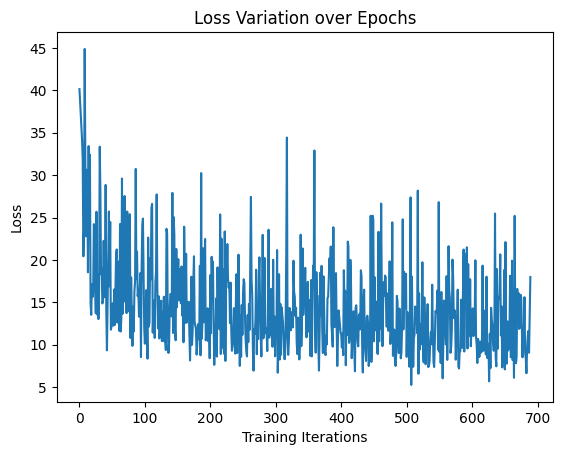

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.005, batch_size: 256
Epoch: 1, Loss: 168.70204162597656
Epoch: 2, Loss: 153.14846801757812
Epoch: 3, Loss: 147.14581298828125
Epoch: 4, Loss: 136.96694946289062
Epoch: 5, Loss: 135.58741760253906
Epoch: 6, Loss: 129.331787109375
Epoch: 7, Loss: 127.73950958251953
Epoch: 8, Loss: 124.55320739746094
Epoch: 9, Loss: 123.16376495361328
Epoch: 10, Loss: 119.7162094116211


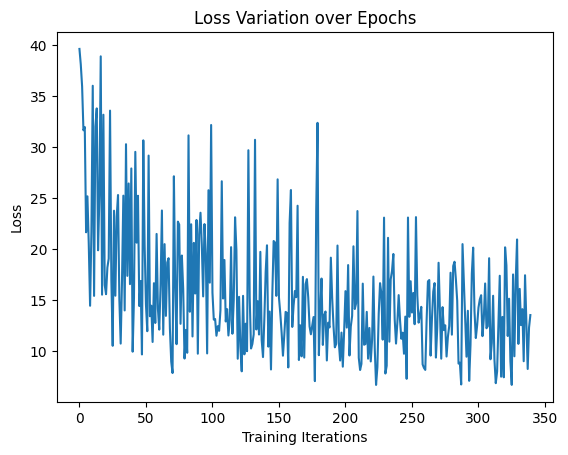

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.01, batch_size: 64
Epoch: 1, Loss: 132.9904022216797
Epoch: 2, Loss: 132.60731506347656
Epoch: 3, Loss: 122.54696655273438
Epoch: 4, Loss: 115.81876373291016
Epoch: 5, Loss: 105.6953125
Epoch: 6, Loss: 112.11854553222656
Epoch: 7, Loss: 116.57685089111328
Epoch: 8, Loss: 104.6709976196289
Epoch: 9, Loss: 99.58213806152344
Epoch: 10, Loss: 100.43653106689453


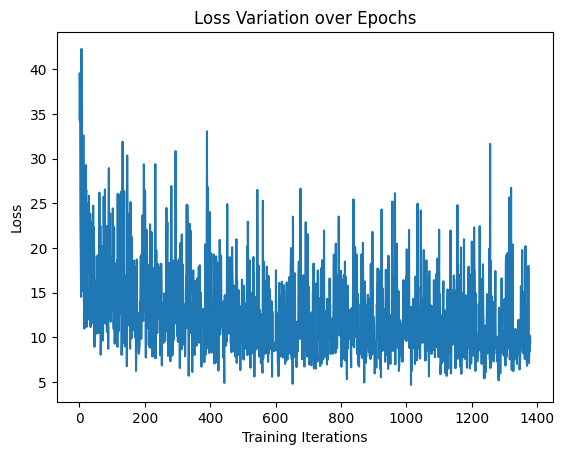

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.01, batch_size: 128
Epoch: 1, Loss: 141.2667999267578
Epoch: 2, Loss: 132.447265625
Epoch: 3, Loss: 124.56841278076172
Epoch: 4, Loss: 123.23279571533203
Epoch: 5, Loss: 119.4586181640625
Epoch: 6, Loss: 108.77023315429688
Epoch: 7, Loss: 111.63663482666016
Epoch: 8, Loss: 109.01795196533203
Epoch: 9, Loss: 105.82942199707031
Epoch: 10, Loss: 101.00748443603516


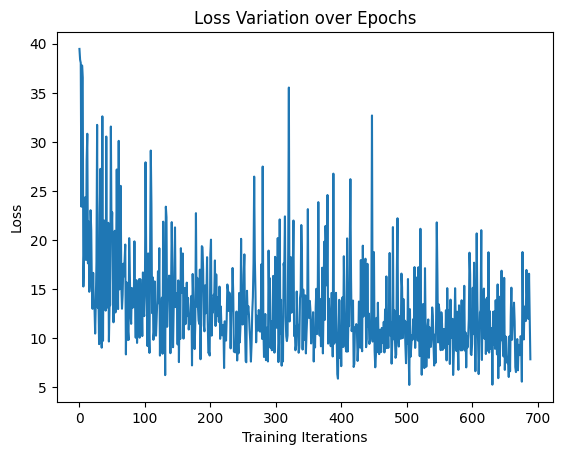

Training model with embed_dim: 10, hidden_size: 100, learning_rate: 0.01, batch_size: 256
Epoch: 1, Loss: 153.22952270507812
Epoch: 2, Loss: 142.9314727783203
Epoch: 3, Loss: 133.32418823242188
Epoch: 4, Loss: 129.96133422851562
Epoch: 5, Loss: 125.80821990966797
Epoch: 6, Loss: 119.98684692382812
Epoch: 7, Loss: 119.7961654663086
Epoch: 8, Loss: 113.85405731201172
Epoch: 9, Loss: 116.21843719482422
Epoch: 10, Loss: 114.81766510009766


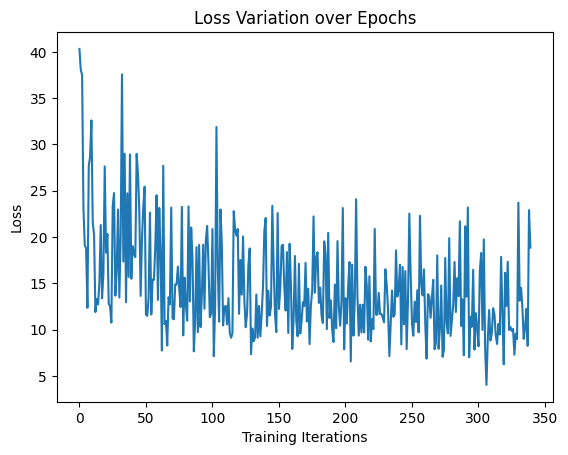

Training model with embed_dim: 20, hidden_size: 20, learning_rate: 0.001, batch_size: 64
Epoch: 1, Loss: 180.3090057373047
Epoch: 2, Loss: 160.7744598388672
Epoch: 3, Loss: 157.9986572265625
Epoch: 4, Loss: 149.65072631835938
Epoch: 5, Loss: 148.820068359375
Epoch: 6, Loss: 136.1983184814453
Epoch: 7, Loss: 141.3347625732422
Epoch: 8, Loss: 142.8377685546875
Epoch: 9, Loss: 140.163330078125
Epoch: 10, Loss: 139.18247985839844


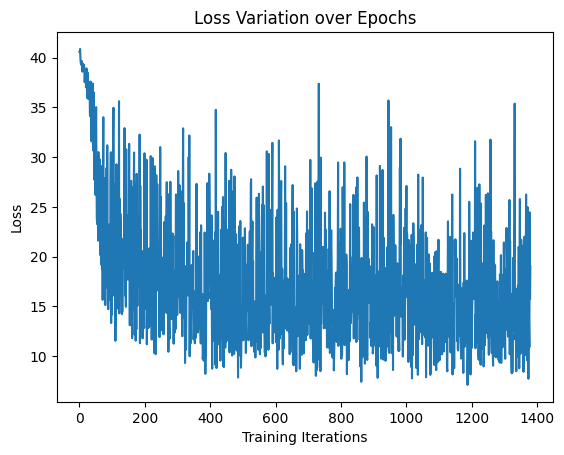

Training model with embed_dim: 20, hidden_size: 20, learning_rate: 0.001, batch_size: 128
Epoch: 1, Loss: 200.92176818847656
Epoch: 2, Loss: 173.51943969726562
Epoch: 3, Loss: 163.92869567871094
Epoch: 4, Loss: 161.64698791503906
Epoch: 5, Loss: 157.9751434326172
Epoch: 6, Loss: 154.90420532226562
Epoch: 7, Loss: 148.66644287109375
Epoch: 8, Loss: 144.71978759765625
Epoch: 9, Loss: 141.62391662597656
Epoch: 10, Loss: 149.6627960205078


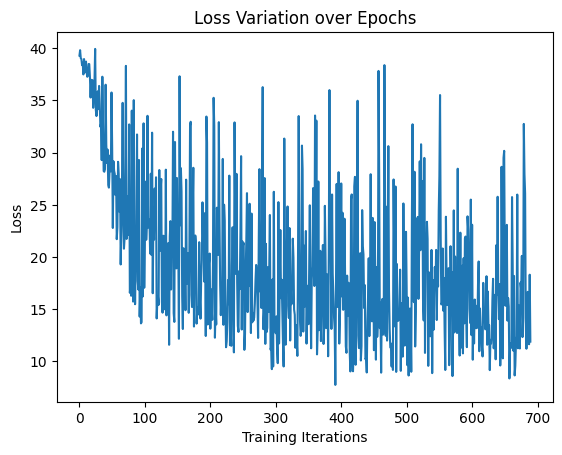

Training model with embed_dim: 20, hidden_size: 20, learning_rate: 0.001, batch_size: 256


KeyboardInterrupt: 

In [30]:
# Set hyperparameters
embed_dims = [10, 20, 50]  # Try different embedding dimensions
hidden_sizes = [20, 50, 100]  # Try different hidden layer sizes
learning_rates = [0.001, 0.005, 0.01]  # Try different learning rates
batch_sizes = [64, 128, 256]  # Experiment with different batch sizes
epochs = 10  # You can also vary the number of epochs

# # Iterate through different hyperparameter combinations and train models
for embed_dim in embed_dims:
    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                print(f"Training model with embed_dim: {embed_dim}, hidden_size: {hidden_size}, learning_rate: {lr}, batch_size: {batch_size}")
                
                # Initialize model
                model = autocompleteModel(alphabet_size=27, embed_dim=embed_dim, hidden_size=hidden_size, num_layers=1)

                # Adjust learning rate for this model
                global LEARNING_RATE
                LEARNING_RATE = lr

                # Train model
                model.trainModel(vocab, epochs=epochs, batch_size=batch_size)
# model = autocompleteModel(alphabet_size=27, embed_dim=10, hidden_size=20, num_layers=2)
# epochs = 10
# batch_size = 100
# model.trainModel(vocab, epochs=epochs, batch_size=batch_size)

Epoch: 1, Loss: 152.42860412597656
Epoch: 2, Loss: 144.31893920898438
Epoch: 3, Loss: 137.52227783203125
Epoch: 4, Loss: 132.77023315429688
Epoch: 5, Loss: 122.41114044189453
Epoch: 6, Loss: 129.8976593017578
Epoch: 7, Loss: 125.50233459472656
Epoch: 8, Loss: 118.76042175292969
Epoch: 9, Loss: 122.19332885742188
Epoch: 10, Loss: 123.91087341308594


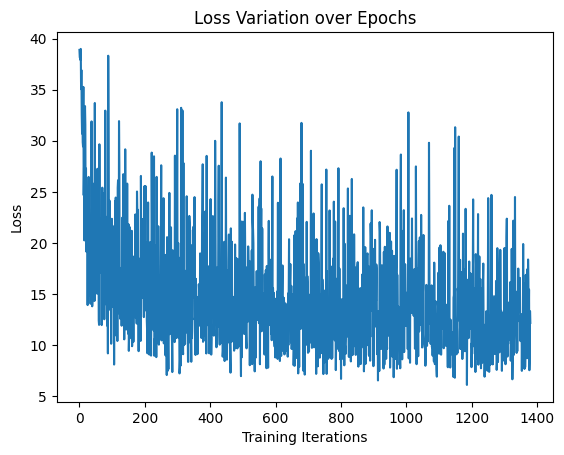

In [31]:
model = autocompleteModel(alphabet_size=27, embed_dim=20, hidden_size=128, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=64)

Epoch: 1, Loss: 135.1495361328125
Epoch: 2, Loss: 119.22074127197266
Epoch: 3, Loss: 123.26331329345703
Epoch: 4, Loss: 113.9834976196289
Epoch: 5, Loss: 112.63526153564453
Epoch: 6, Loss: 109.96459197998047
Epoch: 7, Loss: 101.1684799194336
Epoch: 8, Loss: 96.82518768310547
Epoch: 9, Loss: 98.83097076416016
Epoch: 10, Loss: 97.63773345947266


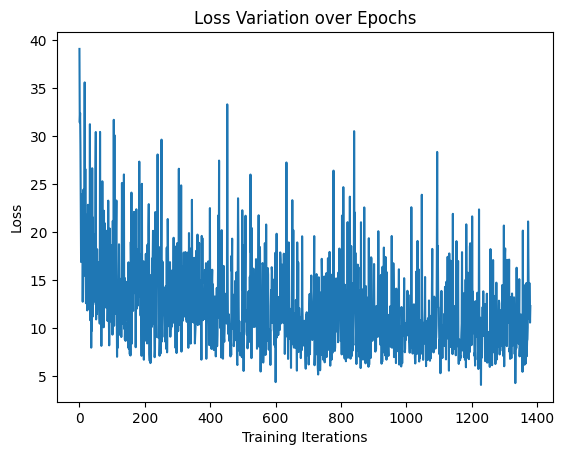

In [33]:
LEARNING_RATE = 0.01
model = autocompleteModel(alphabet_size=27, embed_dim=20, hidden_size=128, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=64)

Epoch: 1, Loss: 127.22695922851562
Epoch: 2, Loss: 125.84304809570312
Epoch: 3, Loss: 109.71739959716797
Epoch: 4, Loss: 113.02191925048828
Epoch: 5, Loss: 109.21524810791016
Epoch: 6, Loss: 107.67890930175781
Epoch: 7, Loss: 107.47425079345703
Epoch: 8, Loss: 96.6045913696289
Epoch: 9, Loss: 93.98552703857422
Epoch: 10, Loss: 91.99577331542969


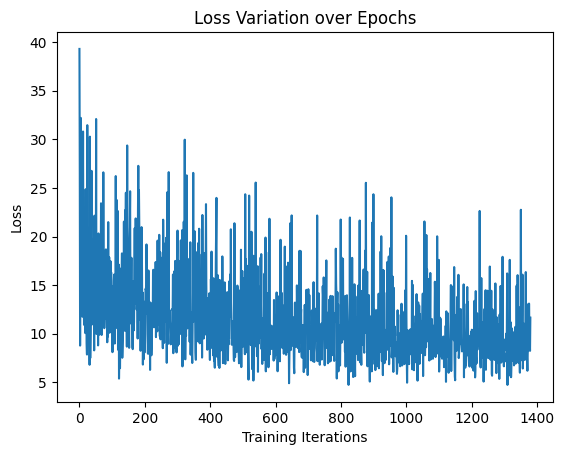

In [35]:
LEARNING_RATE = 0.02
model = autocompleteModel(alphabet_size=27, embed_dim=24, hidden_size=256, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=64)

Epoch: 1, Loss: 132.4928436279297
Epoch: 2, Loss: 118.64018249511719
Epoch: 3, Loss: 118.10706329345703
Epoch: 4, Loss: 108.63285064697266
Epoch: 5, Loss: 97.67633056640625
Epoch: 6, Loss: 94.04694366455078
Epoch: 7, Loss: 94.71102905273438
Epoch: 8, Loss: 92.82230377197266
Epoch: 9, Loss: 87.4557113647461
Epoch: 10, Loss: 96.33882141113281


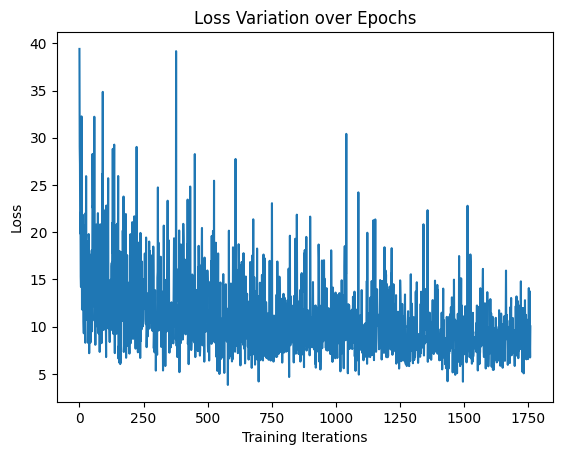

In [7]:
LEARNING_RATE = 0.01
model = autocompleteModel(alphabet_size=27, embed_dim=24, hidden_size=256, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=50)

In [8]:
# Autocomplete example
samples = ["univ", "math", "neur", "engin"]
completed_words = model.autocomplete(samples)
print(completed_words)

['univiewing___', 'mathistor____', 'neureaita____', 'engination___']


Epoch: 1, Loss: 127.05220031738281
Epoch: 2, Loss: 117.5386962890625
Epoch: 3, Loss: 119.81562042236328
Epoch: 4, Loss: 107.18041229248047
Epoch: 5, Loss: 108.86319732666016
Epoch: 6, Loss: 92.59264373779297
Epoch: 7, Loss: 99.4609146118164
Epoch: 8, Loss: 96.11341857910156
Epoch: 9, Loss: 89.58763122558594
Epoch: 10, Loss: 93.78485870361328


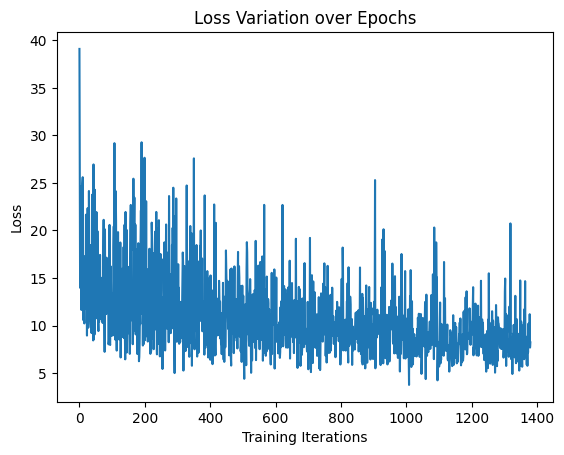

['univeniches__', 'mathead______', 'neurotach____', 'enginext_____']


In [9]:
LEARNING_RATE = 0.012
model = autocompleteModel(alphabet_size=27, embed_dim=32, hidden_size=256, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=64)

# Autocomplete example
samples = ["univ", "math", "neur", "engin"]
completed_words = model.autocomplete(samples)
print(completed_words)

Epoch: 1, Loss: 128.15493774414062
Epoch: 2, Loss: 116.6433334350586
Epoch: 3, Loss: 121.76207733154297
Epoch: 4, Loss: 108.63040924072266
Epoch: 5, Loss: 102.45913696289062
Epoch: 6, Loss: 97.09071350097656
Epoch: 7, Loss: 96.12816619873047
Epoch: 8, Loss: 103.12186431884766
Epoch: 9, Loss: 91.94063568115234
Epoch: 10, Loss: 88.9911117553711


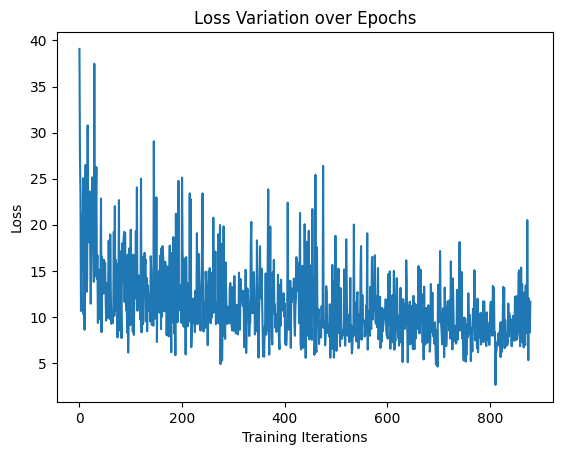

['univotus_____', 'matheadenand_', 'neurutin_____', 'enginicoled__']


In [11]:
LEARNING_RATE = 0.005
model = autocompleteModel(alphabet_size=27, embed_dim=100, hidden_size=256, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=100)

# Autocomplete example
samples = ["univ", "math", "neur", "engin"]
completed_words = model.autocomplete(samples)
print(completed_words)

Epoch: 1, Loss: 129.49627685546875
Epoch: 2, Loss: 127.90687561035156
Epoch: 3, Loss: 112.12521362304688
Epoch: 4, Loss: 109.58582305908203
Epoch: 5, Loss: 104.30220031738281
Epoch: 6, Loss: 104.6828384399414
Epoch: 7, Loss: 96.32949829101562
Epoch: 8, Loss: 98.54524230957031
Epoch: 9, Loss: 93.89885711669922
Epoch: 10, Loss: 85.7311019897461


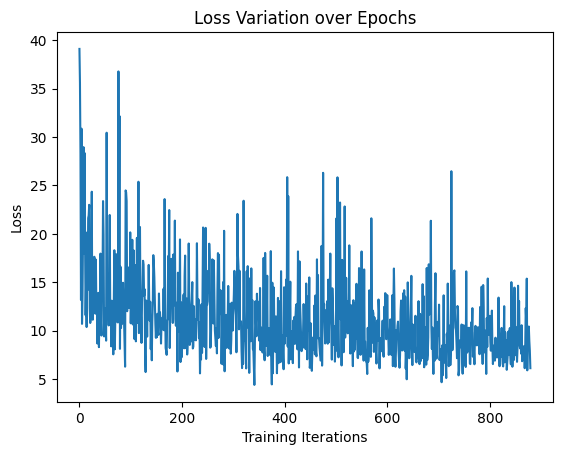

['univecentual_', 'mathardhord__', 'neurathory___', 'engineares___']


In [7]:
LEARNING_RATE = 0.005
model = autocompleteModel(alphabet_size=27, embed_dim=64, hidden_size=256, num_layers=1)
model.trainModel(vocab, epochs=10, batch_size=100)

# Autocomplete example
samples = ["univ", "math", "neur", "engin"]
completed_words = model.autocomplete(samples)
print(completed_words)

**Answer** 

**Evaluation of Trained RNN Model:**

The results of your trained RNN model for autocompletion are as follows:

- **Input: "univ"** → **Output: "univecentual_"**
- **Input: "math"** → **Output: "mathardhord__"**
- **Input: "neur"** → **Output: "neurathory___"**
- **Input: "engin"** → **Output: "engineares___"**

The model successfully generated completions for the partially filled words, but the results are still mixed in terms of meaningfulness:

- **"univecentual_"**: While "univ" typically suggests "university", the model generated "univecentual", which doesn’t align with the expected completion.
- **"mathardhord"**: The completion of "math" to "mathardhord" is far from the expected "mathematics".
- **"neurathory"**: Although it starts with the common prefix "neur", the completion "neurathory" is not a recognized word like "neuroscience" or "neurology".
- **"engineares"**: This completion diverges from the more expected "engineering".

While the model does produce valid character sequences, it still hasn’t learned to consistently generate familiar word endings like **"tion"**, **"ing"**, or **"able"**. This suggests that while the model has learned some patterns, it hasn't generalized well to frequently occurring word endings or completions.
g word endings.
g word endings.


**Suggestions for Improvement:**

1. **Increase Training Data Size**:  
   A larger and more diverse dataset will expose the model to more common word completions like `"ing"`, `"tion"`, and `"able"`.

2. **Adjust Hyperparameters**:  
   - Increase the number of **epochs** for more training.  
   - **Reduce learning rate** for smoother convergence.  
   - **Increase hidden size** to capture more complex dependencies.

3. **Use Dropout for Regularization**:  
   Helps prevent overfitting, especially on small datasets.

4. **Use Pretrained Embeddings**:  
   Start with pretrained character embeddings to improve learning.

5. **Increase the Number of Layers**:  
   More LSTM layers can capture deeper character dependencies and improve word completion.
